In [114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
from timewise import ParentSampleBase, WiseDataByVisit
from timewise.utils import get_mirong_sample
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import logging
logging.getLogger("timewise").setLevel("DEBUG")

In [3]:
class MirongParentSample(ParentSampleBase):

    default_keymap = {
        'ra': 'RA',
        'dec': 'DEC',
        'id': 'Name'
    }

    def __init__(self):
        super().__init__(base_name="test/test_mirong_parent_sample")
        self.df = get_mirong_sample()[:10]


class WISEDataTestVersion(WiseDataByVisit):
    base_name = "test/test_wise_data"

    def __init__(self, base_name=base_name):
        super().__init__(base_name=base_name,
                         parent_sample_class=MirongParentSample,
                         min_sep_arcsec=8,
                         n_chunks=2)

    def clean_up(self):
        logger.info(f"removing {self.cache_dir}")
        shutil.rmtree(self.cache_dir)
        
        
class WISEDataTestVersionNewBinning(WiseDataByVisit):
    base_name = "test/test_wise_data_new_binning"
    
    band_plot_colors = {"W1": "pink", "W2": "violet"}

    def __init__(self, base_name=base_name):
        super().__init__(base_name=base_name,
                         parent_sample_class=MirongParentSample,
                         min_sep_arcsec=8,
                         n_chunks=2)

    def clean_up(self):
        logger.info(f"removing {self.cache_dir}")
        shutil.rmtree(self.cache_dir)

In [4]:
wd = WISEDataTestVersion()
wd_new = WISEDataTestVersionNewBinning()

DEBUG:MainThread timewise.utils - 09:51:01: loading /Users/jannisnecker/tde_catalogue/cache/mirong_sample.csv
DEBUG:MainThread timewise.utils - 09:51:01: loading /Users/jannisnecker/tde_catalogue/cache/mirong_sample.csv


In [7]:
lc = wd_new._get_unbinned_lightcurves(1)

DEBUG:MainThread timewise.wise_data_base - 09:53:12: chunk 1: loading 2 files for chunk 1


In [168]:
%timeit wd_new.bin_lightcurve(lc)

13.4 ms ± 37.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [169]:
%timeit wd.bin_lightcurve(lc)

107 ms ± 221 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [122]:
wd_new.bin_lightcurve(lc)

,mean_mjd,W1_mean_flux,W1_flux_rms,W1_flux_ul,W1_flux_Npoints,W1_mean_mag,W1_mag_rms,W1_mag_ul,W1_mag_Npoints,W1_mean_flux_density,...,W2_flux_ul,W2_flux_Npoints,W2_mean_mag,W2_mag_rms,W2_mag_ul,W2_mag_Npoints,W2_mean_flux_density,W2_flux_density_rms,W2_flux_density_ul,W2_flux_density_Npoints
0,55378.539874,792.4085,52.364540,False,38.0,13.2525,0.117444,False,38.0,1.547720,...,False,38.0,12.6700,0.123059,False,38.0,1.469160,0.111352,False,38.0
1,55558.115828,744.2310,65.337959,False,35.0,13.3210,0.156119,False,35.0,1.453502,...,False,35.0,12.8700,0.132754,False,35.0,1.221603,0.137628,False,35.0
2,56653.684314,661.9450,84.252698,False,46.0,13.7140,0.085741,False,46.0,1.010993,...,False,46.0,12.7915,0.085335,False,46.0,1.314880,0.120665,False,46.0
3,56840.773685,650.2600,83.370475,False,42.0,13.7390,0.080719,False,42.0,0.988979,...,False,42.0,12.7080,0.096425,False,42.0,1.418579,0.129486,False,42.0
4,57019.148322,632.9400,86.375884,False,41.0,13.7540,0.085141,False,41.0,0.975547,...,False,41.0,12.7960,0.091569,False,41.0,1.307790,0.142892,False,41.0
5,57203.417370,742.4900,82.442853,False,37.0,13.5840,0.084872,False,37.0,1.140930,...,False,37.0,12.7300,0.104676,False,37.0,1.390159,0.149972,False,37.0
6,57377.955384,790.0100,57.722729,False,38.0,13.5180,0.074764,False,38.0,1.212078,...,False,38.0,12.6610,0.107722,False,38.0,1.481006,0.125718,False,38.0
7,57568.345913,965.8800,46.687014,False,40.0,13.3000,0.070091,False,40.0,1.481811,...,False,40.0,12.4755,0.108612,False,40.0,1.757748,0.123963,False,40.0
8,57737.933866,907.2600,36.683687,False,47.0,13.3680,0.054956,False,47.0,1.391644,...,False,47.0,12.4980,0.087440,False,47.0,1.720756,0.094777,False,47.0
9,57932.647786,884.4400,60.684359,False,43.0,13.3940,0.092962,False,43.0,1.358410,...,False,43.0,12.3620,0.142270,False,43.0,1.950786,0.138183,False,43.0


In [212]:
for c in range(2):
    wd._subprocess_select_and_bin(service="tap", chunk_number=c)
    wd.calculate_metadata(service="tap", chunk_number=c)
    
wd._combine_data_products(service="tap", overwrite=True)

DEBUG:MainThread timewise.wise_data_base - 13:36:30: chunk 0: loading 2 files for chunk 0
DEBUG:MainThread timewise.wise_data_base - 13:36:30: chunk 0: going through 5 IDs
DEBUG:MainThread timewise.wise_data_base - 13:36:30: loading /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data/photometry/timewise_data_product_tap__chunk0.json
binning: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00,  8.80it/s]
DEBUG:MainThread timewise.wise_data_base - 13:36:30: chunk 0: saving 5 binned lcs
DEBUG:MainThread timewise.wise_data_base - 13:36:30: saving 5 new lightcurves to /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data/photometry/timewise_data_product_tap__chunk0.json
DEBUG:MainThread timewise.wise_data_base - 13:36:30: loading /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data/photometry/timewise_data_product_tap__chunk0.json
calculating metadata: 100%|██████████████████████████████████████████████████

In [210]:
for c in range(2):
    wd_new._subprocess_select_and_bin(service="tap", chunk_number=c)
    wd_new.calculate_metadata(service="tap", chunk_number=c)
    
wd_new._combine_data_products(service="tap", overwrite=True)

DEBUG:MainThread timewise.wise_data_base - 13:35:44: chunk 0: loading 2 files for chunk 0
DEBUG:MainThread timewise.wise_data_base - 13:35:44: chunk 0: going through 5 IDs
DEBUG:MainThread timewise.wise_data_base - 13:35:44: loading /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data_new_binning/photometry/timewise_data_product_tap__chunk0.json
binning: 100%|███████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 67.85it/s]
DEBUG:MainThread timewise.wise_data_base - 13:35:44: chunk 0: saving 5 binned lcs
DEBUG:MainThread timewise.wise_data_base - 13:35:44: saving 5 new lightcurves to /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data_new_binning/photometry/timewise_data_product_tap__chunk0.json
DEBUG:MainThread timewise.wise_data_base - 13:35:44: loading /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data_new_binning/photometry/timewise_data_product_tap__chunk0.json
calculating metadata: 100%|██████████████

DEBUG:MainThread timewise.wise_data_base - 13:42:16: chunk number is 0 for 2
DEBUG:MainThread timewise.wise_data_base - 13:42:16: loading /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data_new_binning/photometry/timewise_data_product_tap__chunk0.json
DEBUG:MainThread timewise.wise_data_base - 13:42:16: loading /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data/photometry/timewise_data_product_tap__chunk0.json
DEBUG:MainThread timewise.wise_data_base - 13:42:16: loading binned lightcurves
DEBUG:MainThread timewise.wise_data_base - 13:42:16:  for 2
DEBUG:MainThread timewise.wise_data_base - 13:42:16: chunk number is 0 for 2
DEBUG:MainThread timewise.wise_data_base - 13:42:16: chunk 0: loading 2 files for chunk 0
DEBUG:MainThread timewise.wise_data_base - 13:42:16: loading binned lightcurves
DEBUG:MainThread timewise.wise_data_base - 13:42:16:  for 2


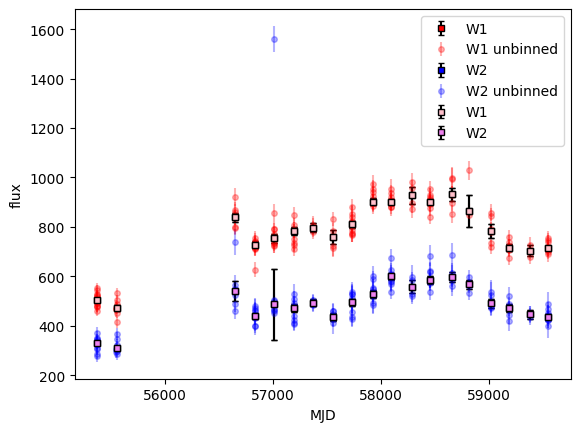

DEBUG:MainThread timewise.wise_data_base - 13:42:17: loading binned lightcurves
DEBUG:MainThread timewise.wise_data_base - 13:42:17:  for 2
DEBUG:MainThread timewise.wise_data_base - 13:42:17: chunk number is 0 for 2
DEBUG:MainThread timewise.wise_data_base - 13:42:17: chunk 0: loading 2 files for chunk 0
DEBUG:MainThread timewise.wise_data_base - 13:42:17: loading binned lightcurves
DEBUG:MainThread timewise.wise_data_base - 13:42:17:  for 2


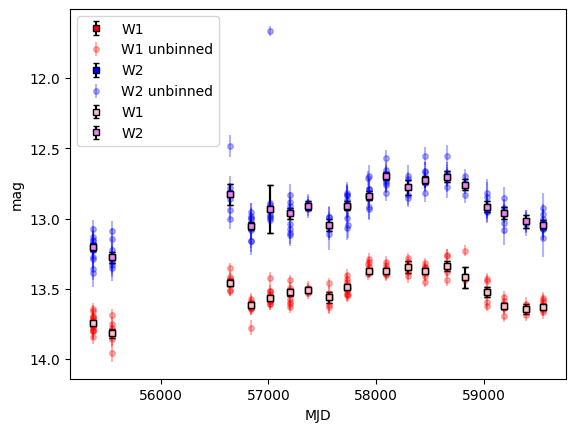

DEBUG:MainThread timewise.wise_data_base - 13:42:17: loading binned lightcurves
DEBUG:MainThread timewise.wise_data_base - 13:42:17:  for 2
DEBUG:MainThread timewise.wise_data_base - 13:42:17: loading binned lightcurves
DEBUG:MainThread timewise.wise_data_base - 13:42:17:  for 2


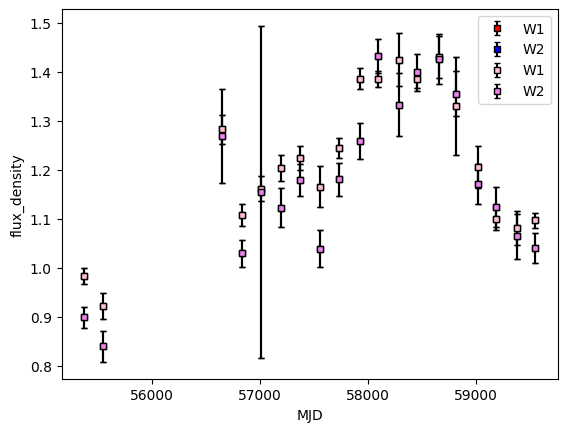

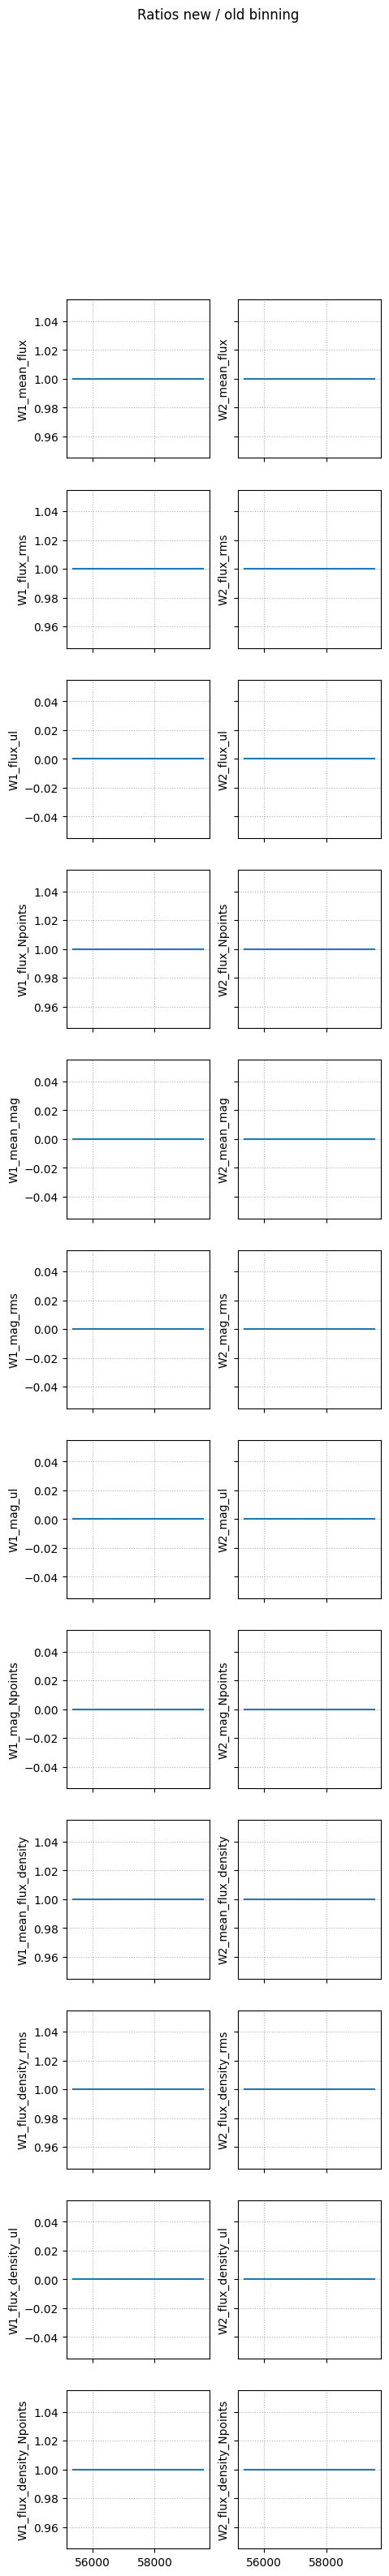

In [216]:
i = 2

cn = wd_new._get_chunk_number(parent_sample_index=i)
dp_new = wd_new._load_data_product(chunk_number=cn, service="tap")
dp_old = wd._load_data_product(chunk_number=cn, service="tap")

lc_new = pd.DataFrame.from_dict(dp_new[str(i)]["timewise_lightcurve"])
lc_old = pd.DataFrame.from_dict(dp_old[str(i)]["timewise_lightcurve"])

for k in ["flux", "mag", "flux_density"]:
    plot_unbinned = False if k == "flux_density" else True
    fig, ax = wd.plot_lc(i, interactive=True, save=False, lum_key=k, service="tap", plot_unbinned=plot_unbinned)
    wd_new.plot_lc(i, interactive=True, save=False, lum_key=k, service="tap", ax=ax)
    if k == "mag":
        ax.set_ylim(ax.get_ylim()[::-1])
    fig.savefig(f"./check_lc{i}_{k}.pdf")
    plt.show()
    

    
keys = ['mean_flux', 'flux_rms', 'flux_ul',
   'flux_Npoints', 'mean_mag', 'mag_rms', 'mag_ul',
   'mag_Npoints', 'mean_flux_density', 'flux_density_rms',
   'flux_density_ul', 
        'flux_density_Npoints']
    
fig, axs = plt.subplots(
    nrows=len(keys), ncols=2, 
    sharex="all", sharey="row",
    figsize=(5, 3*len(keys))
)

for ik, k in enumerate(keys):
    for ib, b in enumerate(wd_new.bands):
        ax = axs[ik][ib]

        full_key = f"{b}_{k}"
        if "ul" in full_key:
            ratio = lc_new[full_key].astype(int) - lc_old[full_key].astype(int)
        elif "mag" in full_key:
            ratio = lc_new[full_key] - lc_old[full_key]
        else:
            ratio = lc_new[full_key] / lc_old[full_key]
        ax.plot(lc_old.mean_mjd, ratio)
        ax.set_ylabel(full_key)
        ax.grid(ls=":")
        
fig.suptitle("Ratios new / old binning")
fig.savefig(f"./check_lc{i}_ratios.pdf")
plt.show()

In [206]:
real_keys = [f"{b}_{k}" for b in wd.bands for k in keys if "ul" not in k]
lc_new[real_keys] - lc_old[real_keys]


,W1_mean_flux,W1_flux_rms,W1_flux_Npoints,W1_mean_mag,W1_mag_rms,W1_mag_Npoints,W1_mean_flux_density,W1_flux_density_rms,W1_flux_density_Npoints,W2_mean_flux,W2_flux_rms,W2_flux_Npoints,W2_mean_mag,W2_mag_rms,W2_mag_Npoints,W2_mean_flux_density,W2_flux_density_rms,W2_flux_density_Npoints
0,0.0,-3.772738,0.0,0.0,-0.004369,0.0,0.0,-0.007369,0.0,0.0,-1.489754,0.0,0.0,-0.005357,0.0,0.0,-0.004056,0.0
1,0.0,-5.363382,0.0,0.0,-0.012296,0.0,0.0,-0.010476,0.0,0.0,-1.288875,0.0,0.0,-0.006808,0.0,0.0,-0.003509,0.0
2,0.0,-7.613944,0.0,0.0,-0.009656,0.0,0.0,-0.011639,0.0,0.0,-24.087940,0.0,0.0,-0.045117,0.0,0.0,-0.056708,0.0
3,0.0,-4.067495,0.0,0.0,-0.002968,0.0,0.0,-0.006187,0.0,0.0,-2.338847,0.0,0.0,0.000000,0.0,0.0,-0.005478,0.0
4,0.0,-3.415388,0.0,0.0,-0.006250,0.0,0.0,-0.005265,0.0,0.0,-9.331225,0.0,0.0,-0.022379,0.0,0.0,-0.022136,0.0
5,0.0,-2.195035,0.0,0.0,-0.001189,0.0,0.0,-0.003373,0.0,0.0,-6.339649,0.0,0.0,-0.011271,0.0,0.0,-0.015101,0.0
6,0.0,-9.852214,0.0,0.0,0.000000,0.0,0.0,-0.015113,0.0,0.0,-2.760261,0.0,0.0,0.000000,0.0,0.0,-0.006598,0.0
7,0.0,-12.020835,0.0,0.0,-0.016358,0.0,0.0,-0.018445,0.0,0.0,-3.126825,0.0,0.0,0.000000,0.0,0.0,-0.007458,0.0
8,0.0,-6.336852,0.0,0.0,-0.003557,0.0,0.0,-0.009723,0.0,0.0,-2.469422,0.0,0.0,-0.004243,0.0,0.0,-0.005889,0.0
9,0.0,2.412315,0.0,0.0,0.008431,0.0,0.0,0.003705,0.0,0.0,-2.610828,0.0,0.0,-0.006861,0.0,0.0,-0.006229,0.0


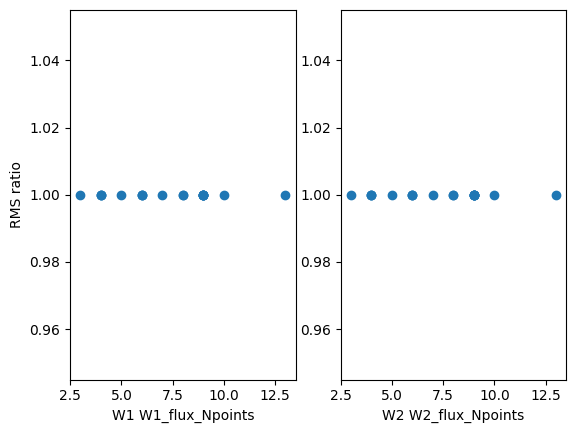

In [214]:
fig, axs = plt.subplots(
    nrows=1, ncols=2,
    sharex="row"
)
for ib, b in enumerate(wd.bands):
    ax = axs[ib]
    rms_key = f"{b}_flux_rms"
    rms_ratio = lc_new[rms_key] / lc_old[rms_key]
    n_key = f"{b}_flux_Npoints"
    n = lc_old[n_key]
    ax.scatter(n, rms_ratio)
    ax.set_xlabel(f"{b} {n_key}")
    
axs[0].set_ylabel("RMS ratio")
plt.show()

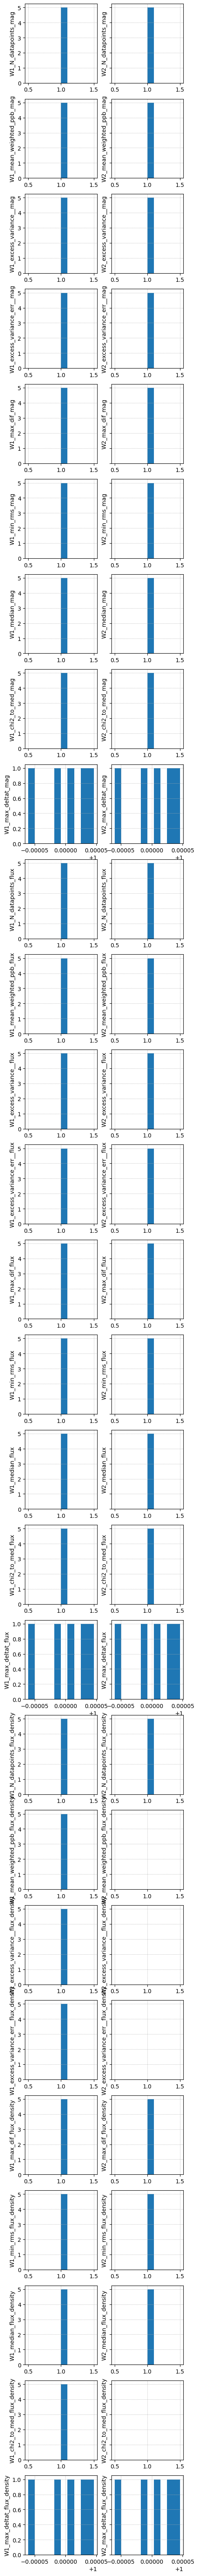

In [217]:
md_new = pd.DataFrame.from_dict({k: v["timewise_metadata"] for k, v in dp_new.items()}, orient="index")
md_old = pd.DataFrame.from_dict({k: v["timewise_metadata"] for k, v in dp_old.items()}, orient="index")

md_keys = ['N_datapoints_mag', 
           'mean_weighted_ppb_mag', 
           'excess_variance__mag', 
           'excess_variance_err__mag', 
           'max_dif_mag', 
           'min_rms_mag', 
           'median_mag', 
           'chi2_to_med_mag', 
           'max_deltat_mag', 
           'N_datapoints_flux', 
           'mean_weighted_ppb_flux', 
           'excess_variance__flux', 
           'excess_variance_err__flux', 
           'max_dif_flux', 
           'min_rms_flux', 
           'median_flux', 
           'chi2_to_med_flux', 
           'max_deltat_flux', 
           'N_datapoints_flux_density', 
           'mean_weighted_ppb_flux_density', 
           'excess_variance__flux_density', 
           'excess_variance_err__flux_density', 
           'max_dif_flux_density', 
           'min_rms_flux_density', 
           'median_flux_density', 
           'chi2_to_med_flux_density', 
           'max_deltat_flux_density']


fig, axs = plt.subplots(
    nrows=len(md_keys), ncols=2, 
    sharex="row", sharey="row",
    figsize=(5, 3*len(md_keys))
)

for ik, k in enumerate(md_keys):
    for ib, b in enumerate(wd_new.bands):
        ax = axs[ik][ib]

        full_key = f"{b}_{k}"
        ratio = md_new[full_key] / md_old[full_key]
        ax.hist(ratio)
        ax.set_ylabel(full_key)
        ax.grid(ls=":")
        
fig.savefig("./metadata_check.pdf")
plt.show()
            

In [100]:
dp_new["5"]["timewise_metadata"].keys()

dict_keys(['W1_N_datapoints_mag', 'W1_mean_weighted_ppb_mag', 'W1_excess_variance__mag', 'W1_excess_variance_err__mag', 'W1_max_dif_mag', 'W1_min_rms_mag', 'W1_median_mag', 'W1_chi2_to_med_mag', 'W1_max_deltat_mag', 'W1_N_datapoints_flux', 'W1_mean_weighted_ppb_flux', 'W1_excess_variance__flux', 'W1_excess_variance_err__flux', 'W1_max_dif_flux', 'W1_min_rms_flux', 'W1_median_flux', 'W1_chi2_to_med_flux', 'W1_max_deltat_flux', 'W1_N_datapoints_flux_density', 'W1_mean_weighted_ppb_flux_density', 'W1_excess_variance__flux_density', 'W1_excess_variance_err__flux_density', 'W1_max_dif_flux_density', 'W1_min_rms_flux_density', 'W1_median_flux_density', 'W1_chi2_to_med_flux_density', 'W1_max_deltat_flux_density', 'W2_N_datapoints_mag', 'W2_mean_weighted_ppb_mag', 'W2_excess_variance__mag', 'W2_excess_variance_err__mag', 'W2_max_dif_mag', 'W2_min_rms_mag', 'W2_median_mag', 'W2_chi2_to_med_mag', 'W2_max_deltat_mag', 'W2_N_datapoints_flux', 'W2_mean_weighted_ppb_flux', 'W2_excess_variance__flux'

In [27]:
dp = wd_new._load_data_product(chunk_number=1, service="tap")

DEBUG:MainThread timewise.wise_data_base - 10:09:23: loading /Users/jannisnecker/tde_catalogue/cache/test/test_wise_data_new_binning/photometry/timewise_data_product_tap__chunk1.json


In [30]:
pd.DataFrame.from_dict(dp['9']["timewise_lightcurve"])

,mean_mjd,W1_mean_flux,W1_flux_rms,W1_flux_ul,W1_flux_Npoints,W1_mean_mag,W1_mag_rms,W1_mag_ul,W1_mag_Npoints,W1_mean_flux_density,...,W2_flux_ul,W2_flux_Npoints,W2_mean_mag,W2_mag_rms,W2_mag_ul,W2_mag_Npoints,W2_mean_flux_density,W2_flux_density_rms,W2_flux_density_ul,W2_flux_density_Npoints
0,55383.514847,257.002250,23.873981,False,4.0,14.482750,0.103040,False,4.0,0.501976,...,False,4.0,13.390500,0.068525,False,4.0,0.758892,0.048421,False,4.0
1,55559.722447,189.817111,7.344775,False,9.0,14.809778,0.044275,False,9.0,0.370686,...,False,9.0,13.670778,0.040416,False,9.0,0.586364,0.021642,False,9.0
2,56657.487025,546.705556,9.444700,False,9.0,13.923556,0.018783,False,9.0,0.834688,...,False,9.0,12.855556,0.023114,False,9.0,1.239845,0.026447,False,9.0
3,56845.545465,606.351000,13.313757,False,10.0,13.816700,0.023759,False,10.0,0.922143,...,False,10.0,12.731600,0.023559,False,10.0,1.390226,0.029405,False,10.0
4,57024.374661,513.648889,12.057020,False,9.0,13.982111,0.024978,False,9.0,0.791787,...,False,9.0,12.839000,0.030946,False,9.0,1.260379,0.035671,False,9.0
5,57207.118581,789.340000,26.942984,False,6.0,13.519500,0.036539,False,6.0,1.212732,...,False,6.0,12.480000,0.027772,False,6.0,1.751749,0.044374,False,6.0
6,57383.640945,889.568571,12.686458,False,7.0,13.389143,0.015440,False,7.0,1.364971,...,False,7.0,12.306857,0.023477,False,7.0,2.054453,0.044990,False,7.0
7,57574.245040,1171.000000,24.098941,False,9.0,13.092333,0.022346,False,9.0,1.796238,...,False,9.0,12.057556,0.014411,False,9.0,2.583461,0.034236,False,9.0
8,57742.726486,938.890000,12.200213,False,10.0,13.331400,0.014378,False,10.0,1.440230,...,False,10.0,12.243100,0.024904,False,10.0,2.180673,0.050462,False,10.0
9,57938.545734,902.837143,21.420020,False,7.0,13.373286,0.025920,False,7.0,1.386575,...,False,7.0,12.310286,0.020964,False,7.0,2.047131,0.039419,False,7.0


In [24]:
ax.get_ylim()[::-1]

(1.3991512216877324, 0.5886118584274458)

In [ ]:
control 
with open()